In [156]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import tensorflow as tf
import datetime
import numpy as np
from  sklearn.preprocessing import MinMaxScaler

In [157]:
# 这里先读取数据
csv_path = "../../数据获取/baostock/k线数据/sh.600000.csv"
df = pd.read_csv(csv_path)

In [158]:
df.head()

,Unnamed: 0,date,code,open,high,low,close,preclose,volume,amount,adjustflag,turn,tradestatus,pctChg,isST
0,0,2015-01-05,sh.600000,8.818609,9.024080,8.640904,8.924121,8.713096,513568704,8.182821e+09,2,3.441509,1,2.4219,0
1,1,2015-01-06,sh.600000,8.885248,9.262871,8.785289,8.957441,8.924121,511684528,8.311085e+09,2,3.428883,1,0.3734,0
2,2,2015-01-07,sh.600000,8.829715,8.979654,8.624244,8.779736,8.957441,385716816,6.114241e+09,2,2.584752,1,-1.9839,0
3,3,2015-01-08,sh.600000,8.813055,8.818609,8.440986,8.468752,8.779736,330627168,5.101311e+09,2,2.215587,1,-3.5421,0
4,4,2015-01-09,sh.600000,8.440986,9.024080,8.391006,8.568711,8.468752,491999936,7.692349e+09,2,3.296973,1,1.1803,0


In [159]:
# # 要转变日期格式
df.index = pd.to_datetime(df.date)
df['week']=df.index.dayofweek+1

In [160]:
df = df[['open','high','low','close','volume']]

In [161]:
df.head()

,open,high,low,close,volume
date,,,,,
2015-01-05,8.818609,9.024080,8.640904,8.924121,513568704
2015-01-06,8.885248,9.262871,8.785289,8.957441,511684528
2015-01-07,8.829715,8.979654,8.624244,8.779736,385716816
2015-01-08,8.813055,8.818609,8.440986,8.468752,330627168
2015-01-09,8.440986,9.024080,8.391006,8.568711,491999936


In [162]:
scaler = MinMaxScaler(feature_range=(0, 1)) 
scaled_data = scaler.fit_transform(df)

In [164]:
# 这里要添加上星期几
df2 = pd.DataFrame(scaled_data, columns=['open','high','low','close','volume'])


In [165]:
df2.head(10)

,open,high,low,close,volume
0,0.328057,0.312839,0.355018,0.364965,0.612887
1,0.342343,0.365375,0.384842,0.372023,0.610638
2,0.330438,0.303064,0.351577,0.334381,0.460310
3,0.326866,0.267632,0.313724,0.268509,0.394567
4,0.247104,0.312839,0.303400,0.289682,0.587147
5,0.282818,0.246862,0.285047,0.264980,0.438913
6,0.238771,0.210209,0.302253,0.260274,0.212906
7,0.260199,0.256636,0.326342,0.296740,0.368779
8,0.281628,0.300621,0.335518,0.370847,0.393611
9,0.370914,0.373928,0.423842,0.412017,0.573120


In [166]:
# 然后我构造数据，
# 我打算以20天为一个周期
period = 20
X = []
Y = np.array(df2.loc[period:, 'close'])

In [167]:
Y.shape

(1677,)

In [169]:
for i in range(0,len(df2)-period):
    # 遍历每一个，然后添加进去
    X.append(df2.loc[i:i+period-1,['open','high','low','close','volume']])

In [170]:
len(X[0])

20

In [172]:
# 要修改一下尺寸
X = np.array(X).reshape(len(df)-period, period, 5)

In [173]:
X.shape

(1677, 20, 5)

In [174]:
Y.shape

(1677,)

# 接下来就是创建LSTM网络了

In [175]:
# Part 2 - Building the RNN
# Initialising the RNN
regressor = tf.keras.Sequential()
# Adding the first LSTM layer and some Dropout regularisation
regressor.add(tf.keras.layers.LSTM(units=50, return_sequences=True, input_shape=X.shape[1:]))
regressor.add(tf.keras.layers.Dropout(0.2))
# Adding a second LSTM layer and some Dropout regularisation
regressor.add(tf.keras.layers.LSTM(units=50, return_sequences=True))
regressor.add(tf.keras.layers.Dropout(0.2))
# Adding a third LSTM layer and some Dropout regularisation
regressor.add(tf.keras.layers.LSTM(units=50, return_sequences=True))
regressor.add(tf.keras.layers.Dropout(0.2))
# Adding a fourth LSTM layer and some Dropout regularisation
regressor.add(tf.keras.layers.LSTM(units=50))
regressor.add(tf.keras.layers.Dropout(0.2))
# Adding the output layer
regressor.add(tf.keras.layers.Dense(units=1))

# Compiling the RNN
regressor.compile(optimizer='sgd', loss='mse')
# Fitting the RNN to the Training set
regressor.fit(X, Y, epochs=10, batch_size=32)

Train on 1677 samples
Epoch 1/10
1677/1677 [==============================] - 22s 13ms/sample - loss: 0.05626
Epoch 2/10
1677/1677 [==============================] - 2s 1ms/sample - loss: 0.0253
Epoch 3/10
1677/1677 [==============================] - 2s 1ms/sample - loss: 0.0237
Epoch 4/10
1677/1677 [==============================] - ETA: 0s - loss: 0.021 - 2s 1ms/sample - loss: 0.0215
Epoch 5/10
1677/1677 [==============================] - 2s 1ms/sample - loss: 0.0194
Epoch 6/10
1677/1677 [==============================] - 2s 1ms/sample - loss: 0.0177
Epoch 7/10
1677/1677 [==============================] - 2s 1ms/sample - loss: 0.0163 0s - loss: 0.0
Epoch 8/10
1677/1677 [==============================] - 2s 1ms/sample - loss: 0.0143
Epoch 9/10
1677/1677 [==============================] - 2s 1ms/sample - loss: 0.0130
Epoch 10/10
1677/1677 [==============================] - 2s 1ms/sample - loss: 0.0128


In [176]:
regressor.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_20 (LSTM)               (None, 20, 50)            11200     
_________________________________________________________________
dropout_20 (Dropout)         (None, 20, 50)            0         
_________________________________________________________________
lstm_21 (LSTM)               (None, 20, 50)            20200     
_________________________________________________________________
dropout_21 (Dropout)         (None, 20, 50)            0         
_________________________________________________________________
lstm_22 (LSTM)               (None, 20, 50)            20200     
_________________________________________________________________
dropout_22 (Dropout)         (None, 20, 50)            0         
_________________________________________________________________
lstm_23 (LSTM)               (None, 50)               

In [177]:
predicted_stock_price = regressor.predict(X)

In [178]:
predicted_stock_price.reshape(-1)

array([0.4091943 , 0.40302184, 0.3949455 , ..., 0.35929963, 0.3601346 ,
       0.36066124], dtype=float32)

In [179]:
Y

array([0.12617632, 0.1744046 , 0.14264451, ..., 0.28783678, 0.29207319,
       0.29842781])

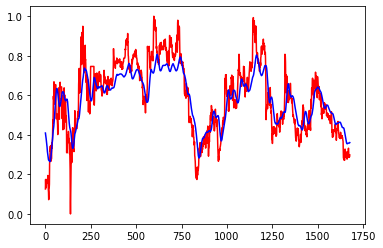

In [180]:
plt.plot(Y, color='red')
plt.plot(predicted_stock_price.reshape(-1), color='blue')